In [1]:
import numpy as np
import pandas as pd

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1IkvJ7G6VQaxikAW97Ht8cGspYIABtY3y/view?usp=sharing' 

In [4]:
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('BERTsent_Dec_Train.csv') 
 
df = pd.read_csv('BERTsent_Dec_Train.csv')
print(df)

       Unnamed: 0                                               text  Label  \
0               0  @Alyssafarah They started the armed conflict a...      0   
1               1  Tucker Carlson emphasized on how much Ukraine ...      1   
2               2  Since day one, the military fighting against U...      0   
3               3  A notable Russian OSS developer promotes a pro...      0   
4               4  US believes Russia could invade Ukraine ‘as so...      1   
...           ...                                                ...    ...   
56126       56126  @20committee Russia could roll through Ukraine...      1   
56127       56127  Russia Preparing 175K Troops For Ukraine Offen...      1   
56128       56128  @politicalblond In other words, Russia is Male...      0   
56129       56129  How the US Military Could Mobilize If Russia I...      1   
56130       56130  “The U.S. and NATO reject Putin’s demands that...      0   

       Negative   Neutral  Positive  
0      0.9267

In [6]:
#0=negative, 1=netral, 2 =positive
df

,Unnamed: 0,text,Label,Negative,Neutral,Positive
0,0,@Alyssafarah They started the armed conflict a...,0,0.926742,0.070582,0.002675
1,1,Tucker Carlson emphasized on how much Ukraine ...,1,0.350306,0.642104,0.007590
2,2,"Since day one, the military fighting against U...",0,0.759732,0.236510,0.003758
3,3,A notable Russian OSS developer promotes a pro...,0,0.499068,0.492452,0.008480
4,4,US believes Russia could invade Ukraine ‘as so...,1,0.190029,0.803336,0.006634
...,...,...,...,...,...,...
56126,56126,@20committee Russia could roll through Ukraine...,1,0.447488,0.545092,0.007420
56127,56127,Russia Preparing 175K Troops For Ukraine Offen...,1,0.095686,0.896965,0.007348
56128,56128,"@politicalblond In other words, Russia is Male...",0,0.946390,0.050894,0.002716
56129,56129,How the US Military Could Mobilize If Russia I...,1,0.040387,0.950251,0.009362


In [8]:
results = df['Label'].value_counts()

In [11]:
results

1    32544
0    22900
2      687
Name: Label, dtype: int64

In [12]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [15]:
from google.colab import files
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

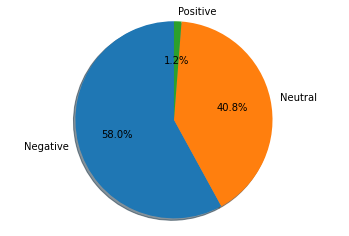

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Neutral', 'Positive'
sizes = [32544, 22900, 687]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('BERTsent_Dec_Results.png')
files.download('BERTsent_Dec_Results.png')
plt.show()